In [32]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the dataset
# Assuming the dataset is in a CSV file named 'heart_disease.csv'
df = pd.read_csv('heart.csv')



In [33]:
# Data Profiling
# Displaying first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())



First few rows of the dataset:
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence 

In [34]:
# Generating summary statistics
print("\nSummary Statistics:")
print(df.describe())




Summary Statistics:
              Age         Sex  Chest pain type          BP  Cholesterol  \
count  270.000000  270.000000       270.000000  270.000000   270.000000   
mean    54.433333    0.677778         3.174074  131.344444   249.659259   
std      9.109067    0.468195         0.950090   17.861608    51.686237   
min     29.000000    0.000000         1.000000   94.000000   126.000000   
25%     48.000000    0.000000         3.000000  120.000000   213.000000   
50%     55.000000    1.000000         3.000000  130.000000   245.000000   
75%     61.000000    1.000000         4.000000  140.000000   280.000000   
max     77.000000    1.000000         4.000000  200.000000   564.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count    270.000000   270.000000  270.000000       270.000000      270.00000   
mean       0.148148     1.022222  149.677778         0.329630        1.05000   
std        0.355906     0.997891   23.165717         0.470952  

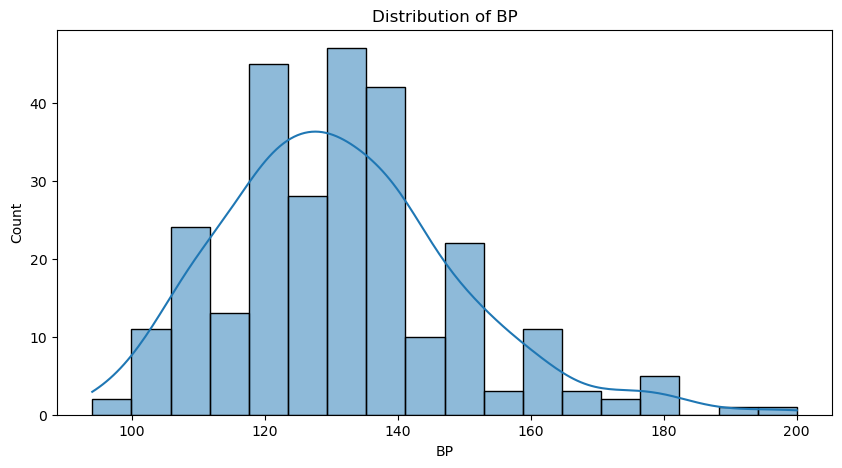

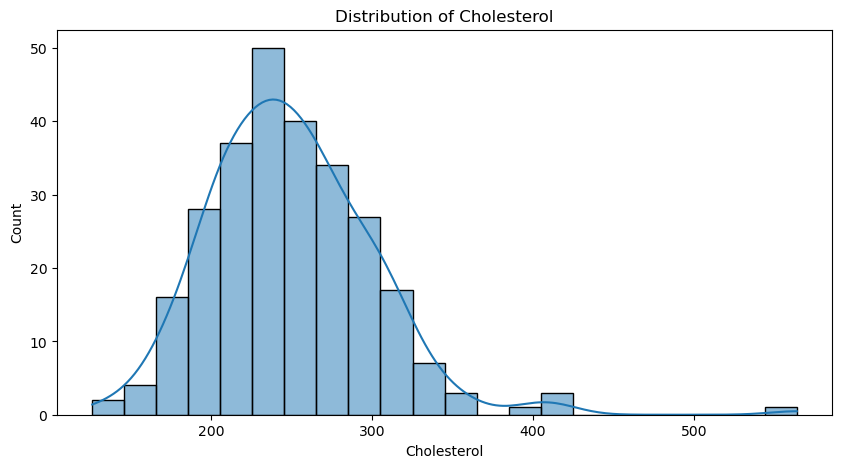

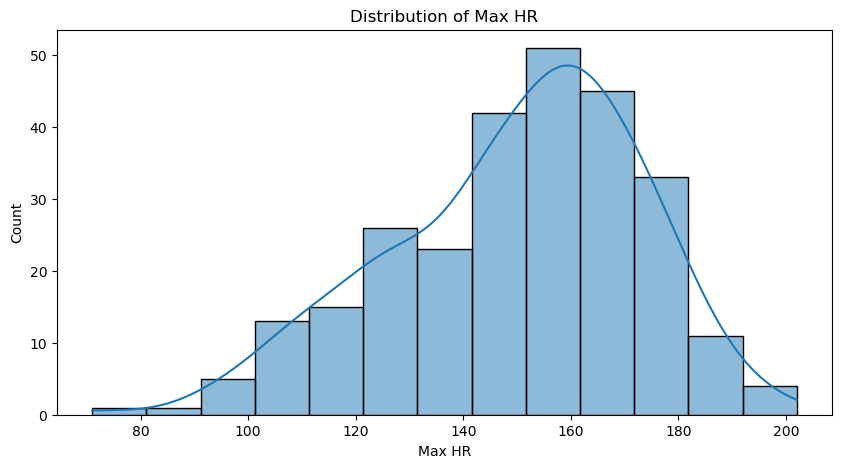

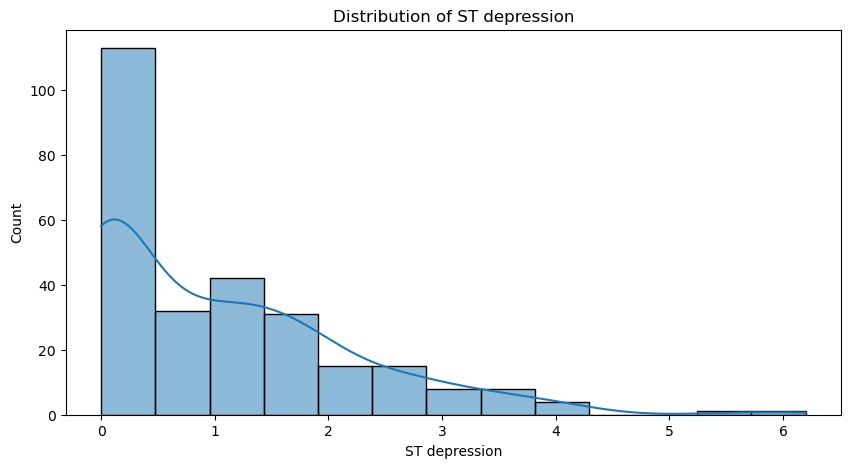

In [35]:
# Visualizing distributions of numerical features
numerical_features = ['BP', 'Cholesterol', 'Max HR', 'ST depression']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()



In [36]:
# Segmentation using KMeans
# Standardize the features before clustering
features = df[['BP', 'Cholesterol', 'Max HR', 'ST depression']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)



In [37]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)



C:\Users\Ravi manik kale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Ravi manik kale\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [38]:
# Visualization
# Traditional Table
print("\nTraditional Table:")
print(df.groupby('Cluster').mean())




Traditional Table:
               Age       Sex  Chest pain type          BP  Cholesterol  \
Cluster                                                                  
0        58.316667  0.550000         3.150000  151.783333   299.000000   
1        50.674242  0.659091         3.022727  123.924242   237.265152   
2        57.807692  0.807692         3.448718  128.179487   232.679487   

         FBS over 120  EKG results      Max HR  Exercise angina  \
Cluster                                                           
0            0.250000     1.216667  148.800000         0.433333   
1            0.128788     0.863636  163.280303         0.174242   
2            0.102564     1.141026  127.333333         0.512821   

         ST depression  Slope of ST  Number of vessels fluro  Thallium  
Cluster                                                                 
0             1.233333     1.600000                 0.766667  5.066667  
1             0.362879     1.333333                 0.

C:\Users\Ravi manik kale\AppData\Local\Temp\ipykernel_20952\2924402761.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cluster').mean())


In [39]:
# Improved Table
print("\nImproved Table:")
improved_table = df.groupby('Cluster').agg({
    'BP': ['mean', 'std'],
    'Cholesterol': ['mean', 'std'],
    'Max HR': ['mean', 'std'],
    'ST depression': ['mean', 'std']
})
print(improved_table)




Improved Table:
                 BP            Cholesterol                 Max HR             \
               mean        std        mean        std        mean        std   
Cluster                                                                        
0        151.783333  17.093057  299.000000  58.243789  148.800000  18.660935   
1        123.924242  12.599904  237.265152  40.069379  163.280303  13.824591   
2        128.179487  13.803579  232.679487  39.363934  127.333333  21.430447   

        ST depression            
                 mean       std  
Cluster                          
0            1.233333  1.088564  
1            0.362879  0.530361  
2            2.071795  1.141075  


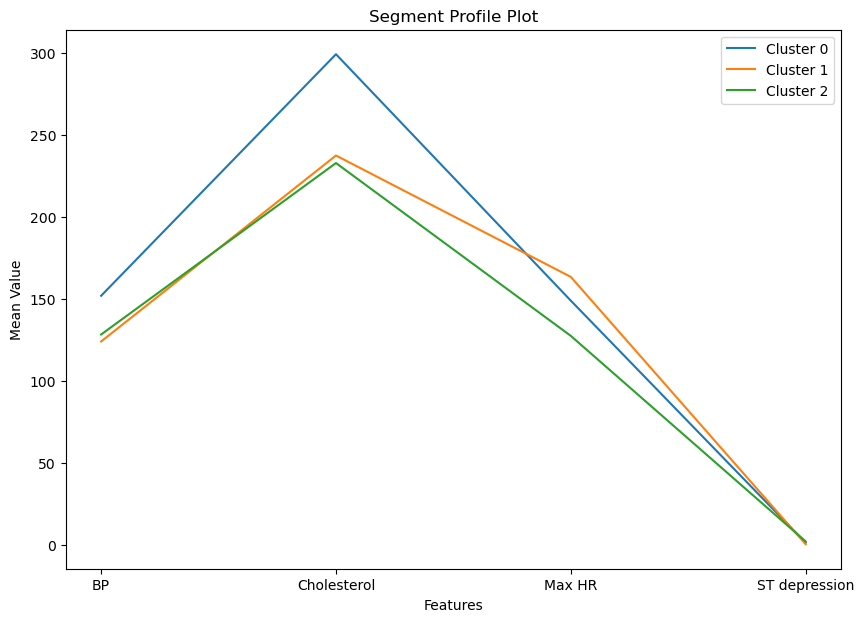

In [40]:
# Segment Profile Plot
plt.figure(figsize=(10, 7))
for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    plt.plot(cluster_data[numerical_features].mean(), label=f'Cluster {i}')
plt.xticks(range(len(numerical_features)), numerical_features)
plt.xlabel('Features')
plt.ylabel('Mean Value')
plt.title('Segment Profile Plot')
plt.legend()
plt.show()



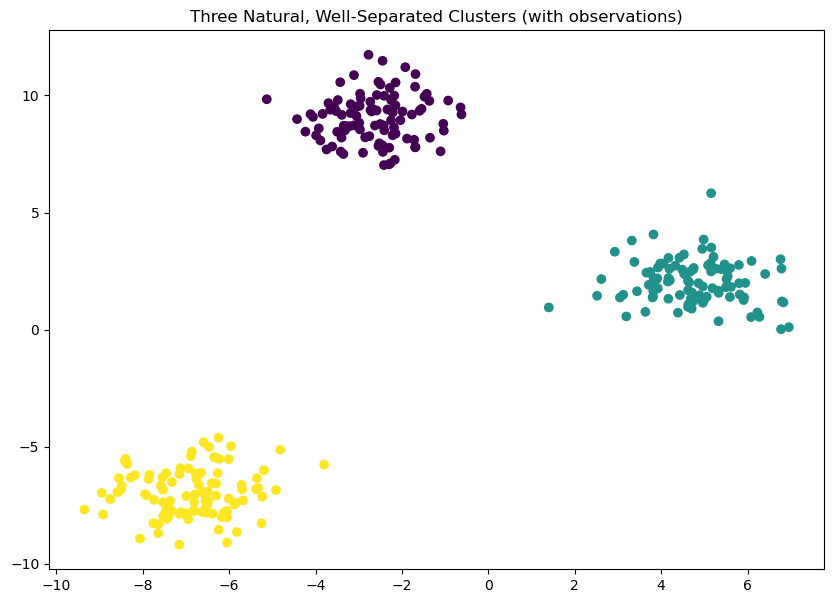

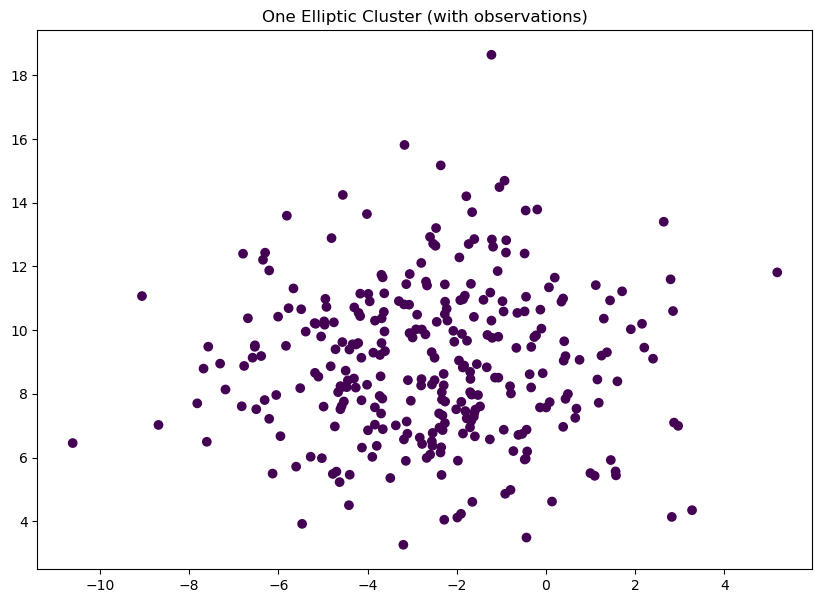

In [43]:
# Segment Separation Plot
# Creating artificial datasets for demonstration
from sklearn.datasets import make_blobs

# Three natural, well-separated clusters
X1, y1 = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
# One elliptic cluster
X2, y2 = make_blobs(n_samples=300, centers=1, cluster_std=2.5, random_state=42)

def plot_clusters(X, y, title):
    plt.figure(figsize=(10, 7))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    plt.title(title)
    plt.show()

plot_clusters(X1, y1, 'Three Natural, Well-Separated Clusters (with observations)')
plot_clusters(X2, y2, 'One Elliptic Cluster (with observations)')



C:\Users\Ravi manik kale\AppData\Local\Temp\ipykernel_20952\2127038264.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')


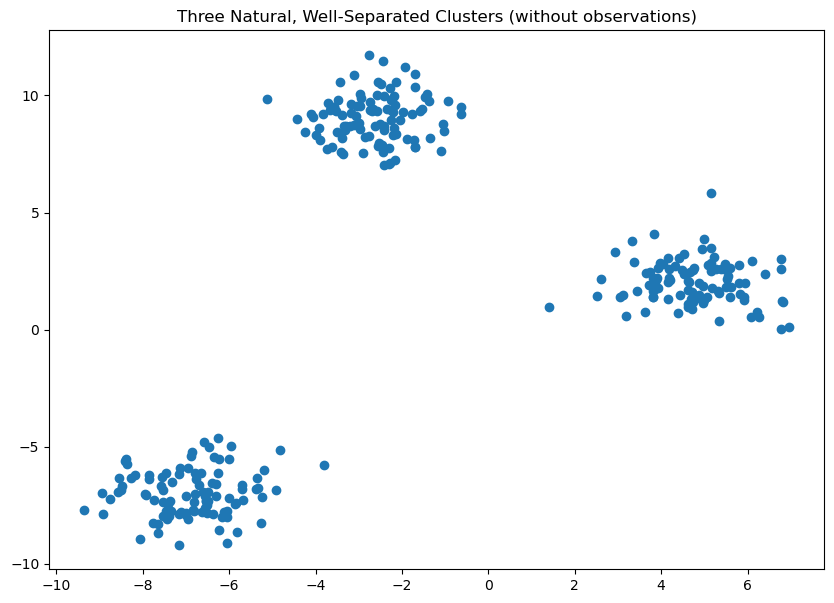

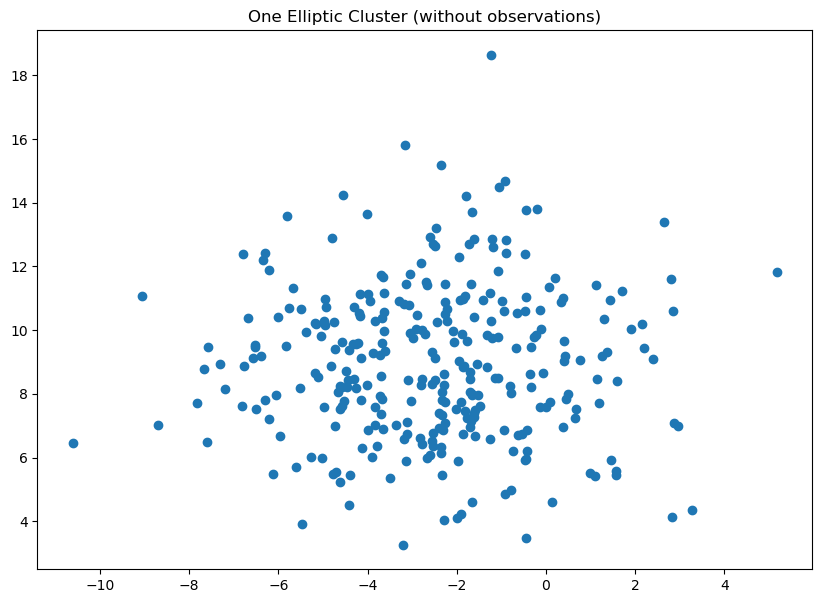

In [42]:
# Removing observations
y1 = None
y2 = None
plot_clusters(X1, y1, 'Three Natural, Well-Separated Clusters (without observations)')
plot_clusters(X2, y2, 'One Elliptic Cluster (without observations)')
